### **Employee attrition increases hiring costs, operational burden, training expenses, and reduces workforce stability**
This project aims to:  
1- Identify the key drivers of employee attrition, and  
2- Build a predictive model that can help HR proactively retain high-risk employees

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from pandas.plotting import scatter_matrix

In [3]:
import os
os.getcwd()

'c:\\Users\\Sarva\\Desktop\\attririon_app\\notebooks'

In [4]:
print(os.getcwd())
print(os.listdir("../data"))

c:\Users\Sarva\Desktop\attririon_app\notebooks
['Attrition_Data.csv', 'attrition_scores.csv']


In [5]:
data = pd.read_csv('Attrition_Data.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

### **Add the attrition column to the end**

In [8]:
Attrition = data['Attrition']

In [9]:
data = data.drop(columns='Attrition')

In [10]:
data['Attrition'] = Attrition

In [11]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


### **Split the data into train and test:**

We do not touch the test set until the end and we will make a copy of the train set and the test set so that we dont have any EDA leakage

In [12]:
X = data.drop(columns='Attrition')
y = data['Attrition']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

train_data = X_train.copy()
train_data['Attrition'] = y_train

test_df = X_test.copy()
test_df['Attrition'] = y_test

### **Lets go for the initial visualizations to determine the correlations between the features and how they affect Attrition**

Before going for visualization we have a few things to do.

- First we will convert the Attrition Feature to Numeric type.


- We will separate the Numeric and the Categorical columns.

In [13]:
train_data['Attrition'] = train_data['Attrition'].map({'Yes':1, 'No':0})

In [14]:
train_data['Attrition'].head()

1194    0
128     0
810     0
478     0
491     0
Name: Attrition, dtype: int64

In [15]:
numeric_cols = []
categorical_cols = []

for column in train_data.columns:
    if train_data[column].dtype=='int64':
        numeric_cols.append(column)
    else:
        categorical_cols.append(column)

In [16]:
print(numeric_cols)
print(categorical_cols)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


### **We will check if we have certain columns that have the same values for all employees using nunique()**

- We will drop the columns that have only 1 unique value across all employees
- These features are same for all employees so they are not good features for Attrition prediction and we will drop them

In [17]:
for column in train_data.columns:
    if train_data[column].nunique() == 1 :
        print(column)

EmployeeCount
Over18
StandardHours


In [18]:
columns_to_drop = ['StandardHours','Over18','EmployeeCount','EmployeeNumber']
for column in columns_to_drop:
    print(train_data[column].value_counts())

StandardHours
80    1176
Name: count, dtype: int64
Over18
Y    1176
Name: count, dtype: int64
EmployeeCount
1    1176
Name: count, dtype: int64
EmployeeNumber
1812    1
1676    1
169     1
1124    1
645     1
       ..
452     1
1264    1
27      1
1403    1
1598    1
Name: count, Length: 1176, dtype: int64


In [19]:
train_data = train_data.drop(columns=columns_to_drop)
train_data.shape

(1176, 31)

We dropped 4 columns now our features have reduced from 35 to 31. We are good to go ahead with the visualization.

## **EXPLORATORY ANALYSIS**

In [20]:
numeric_cols = [col for col in numeric_cols if col not in columns_to_drop]
categorical_cols = [col for col in categorical_cols if col not in columns_to_drop]

print(numeric_cols)
print(categorical_cols)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


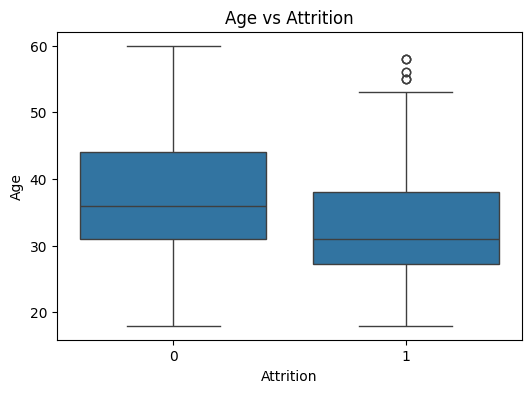

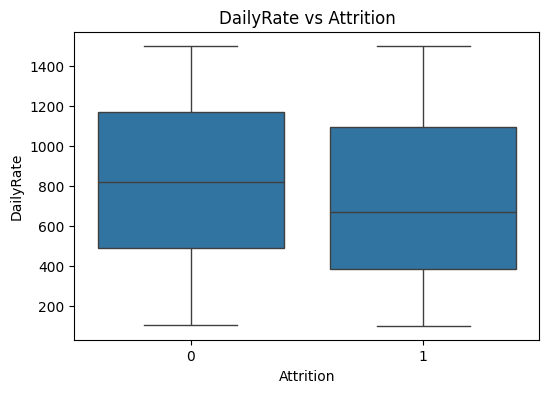

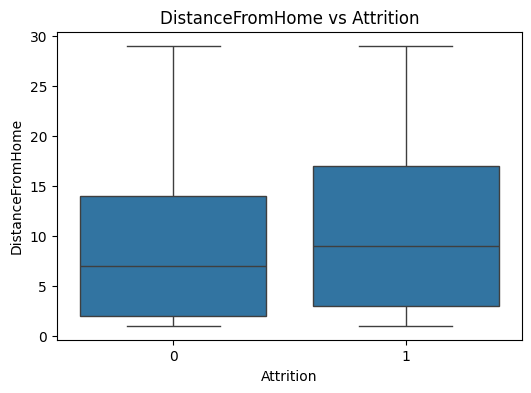

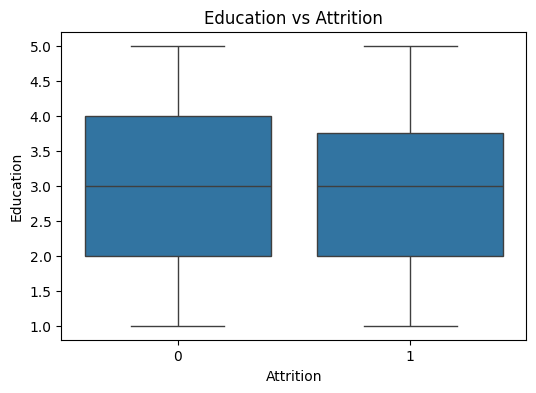

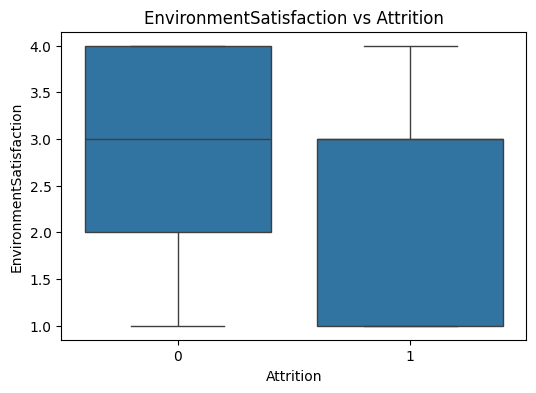

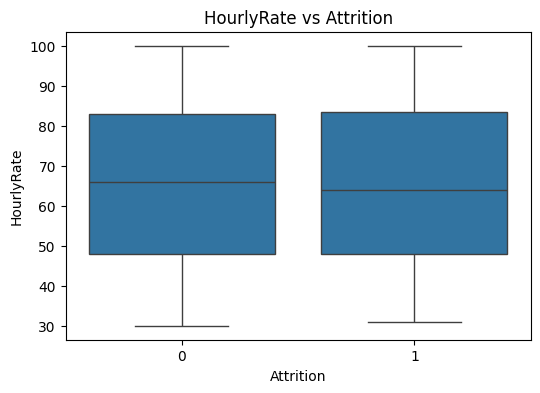

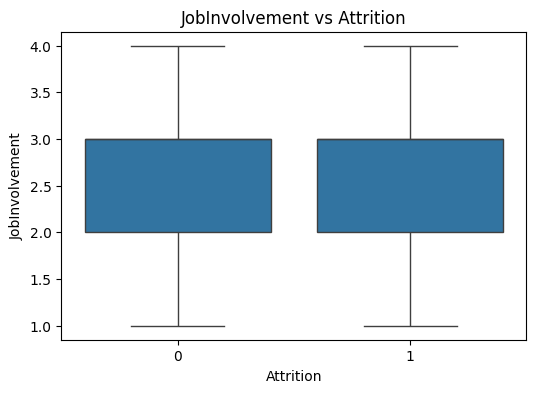

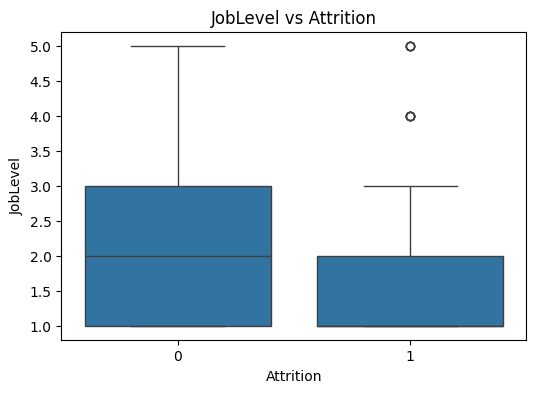

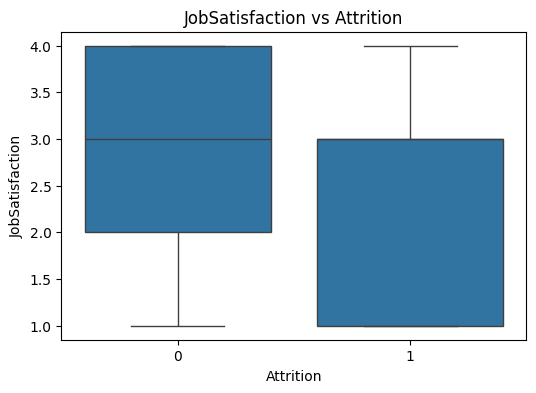

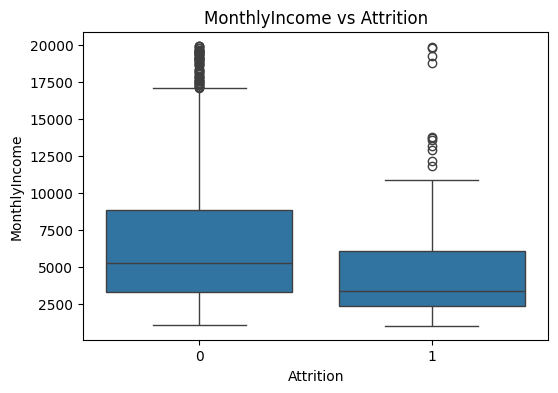

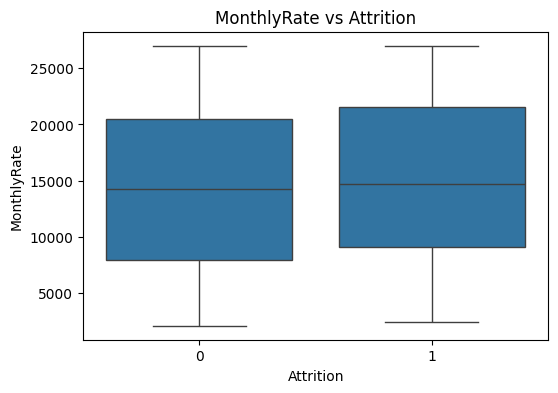

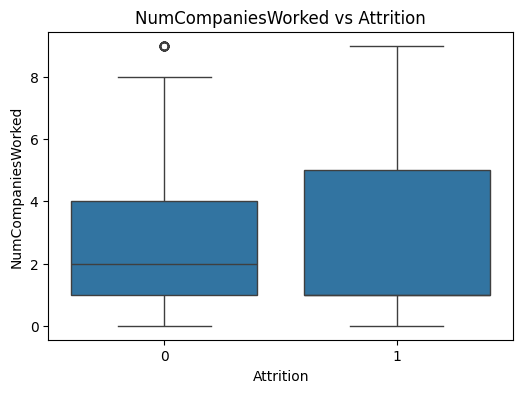

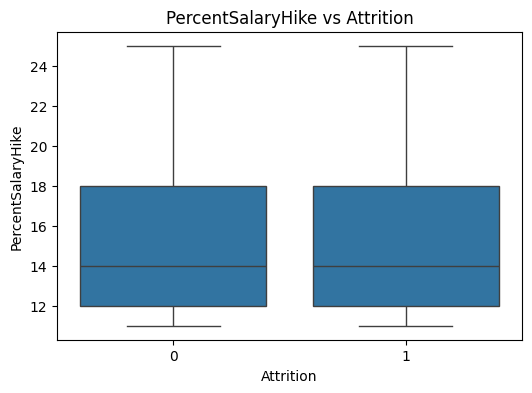

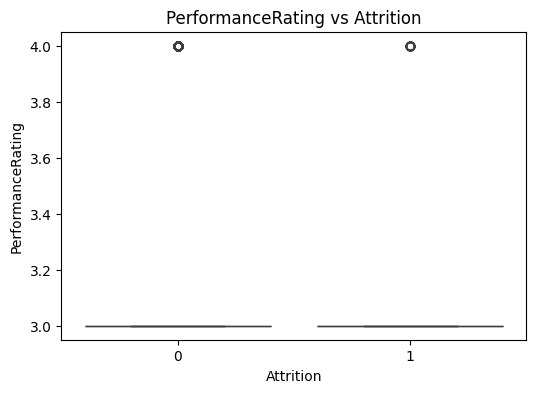

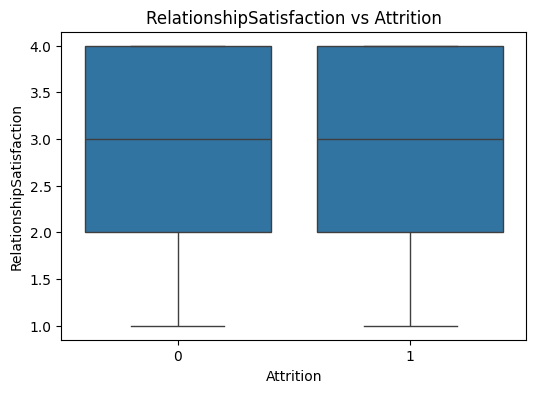

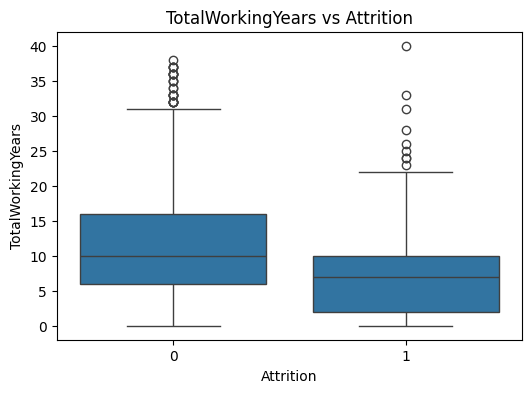

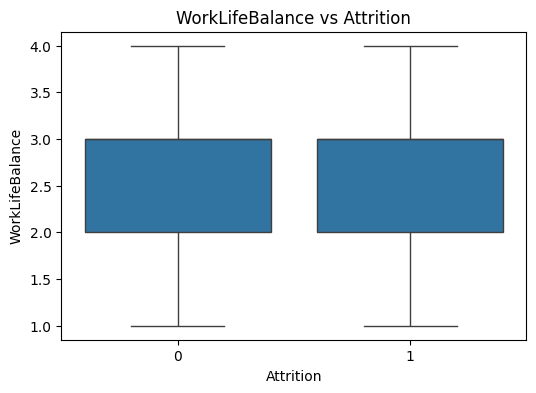

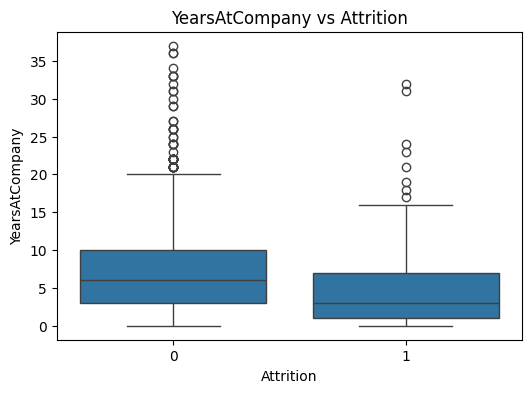

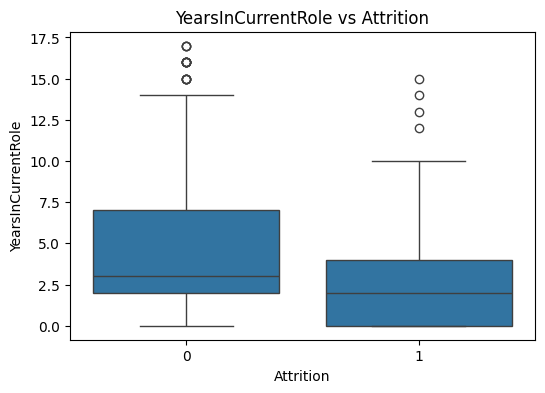

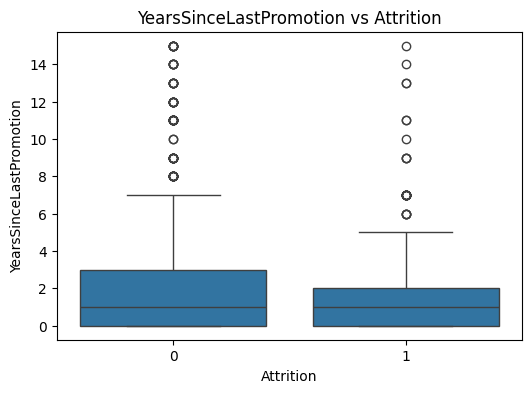

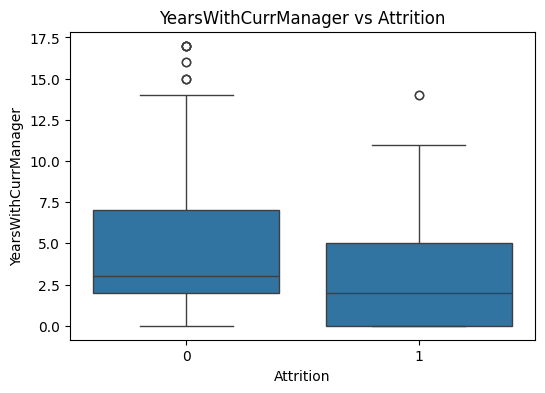

In [21]:
attributes = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for col in attributes:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Attrition', y=col, data=train_data)
    plt.title(f"{col} vs Attrition")
    plt.show()
    


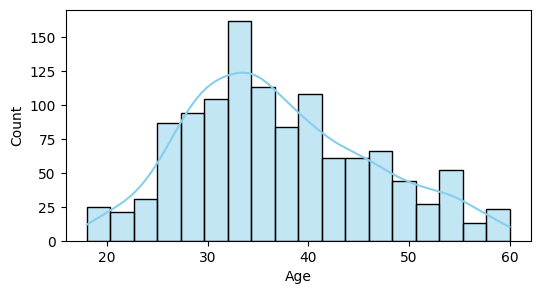

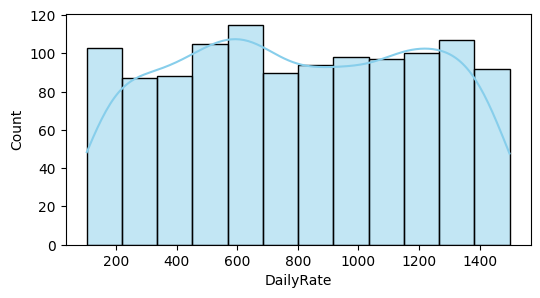

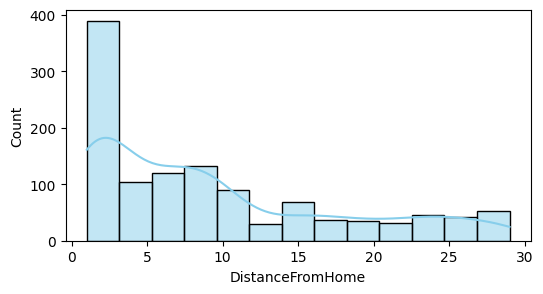

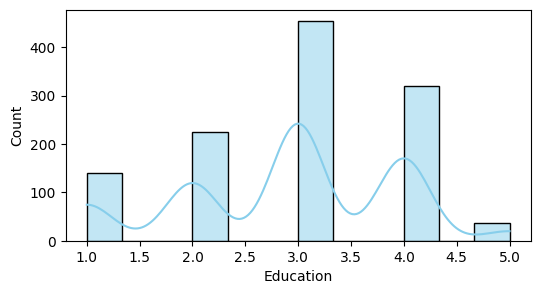

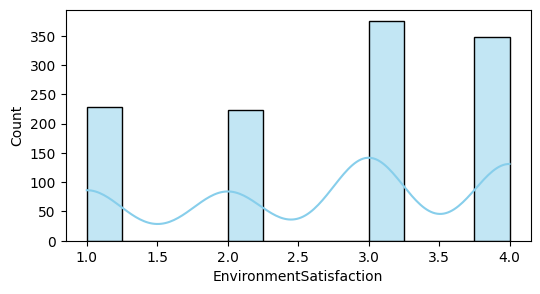

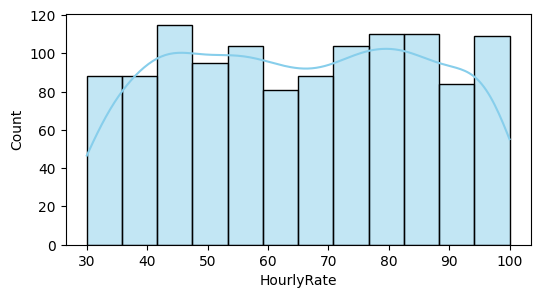

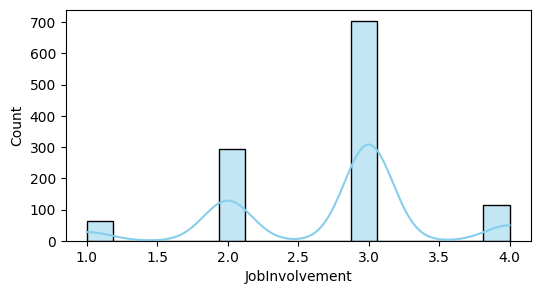

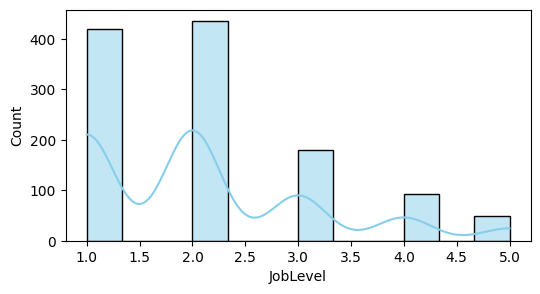

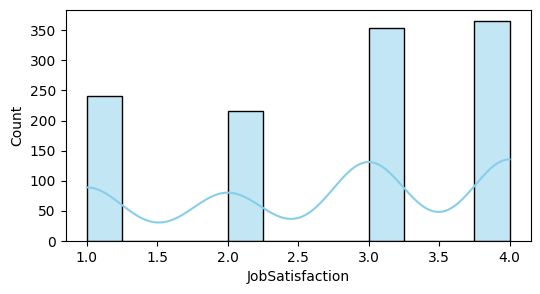

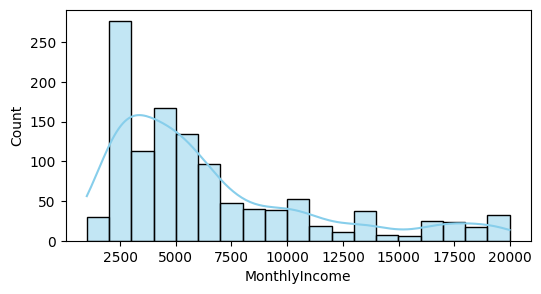

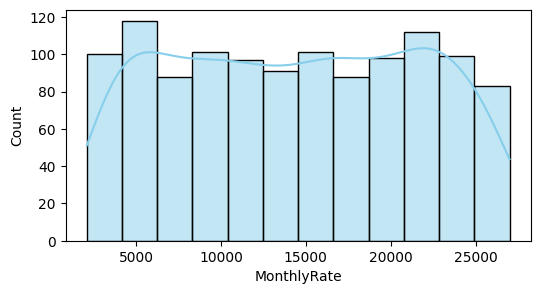

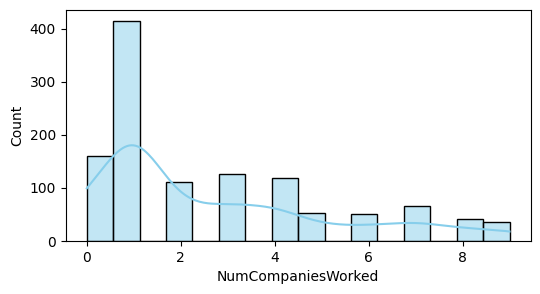

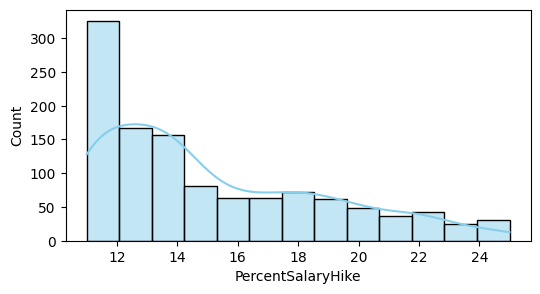

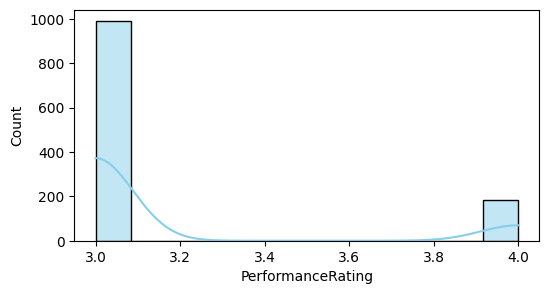

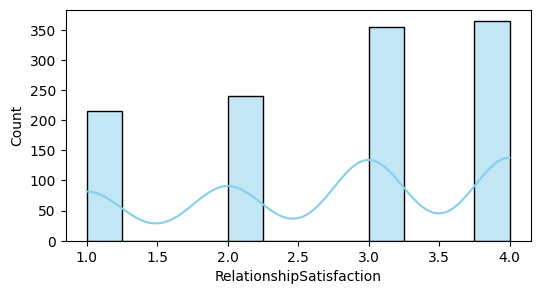

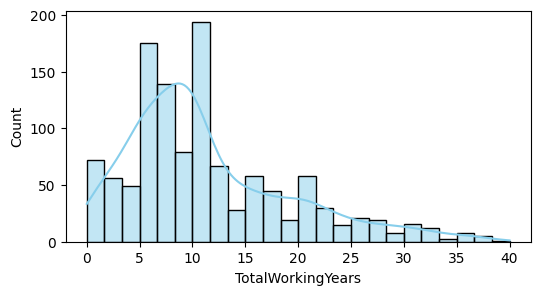

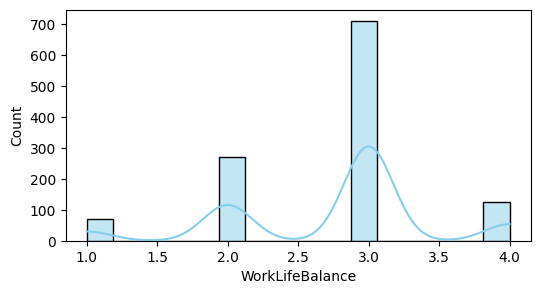

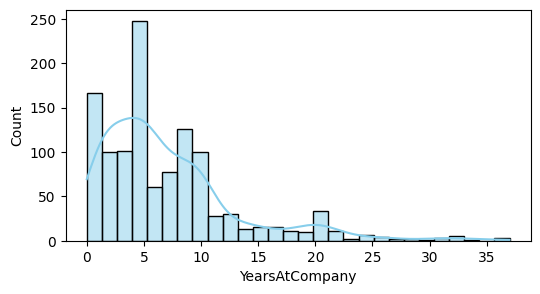

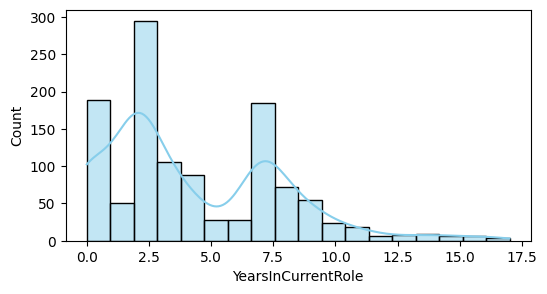

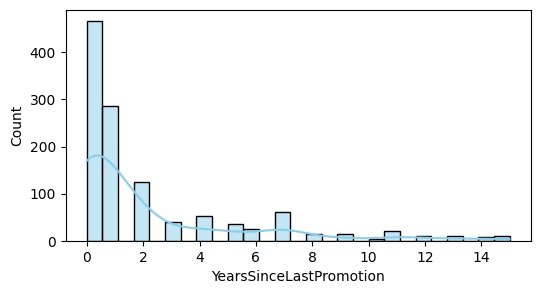

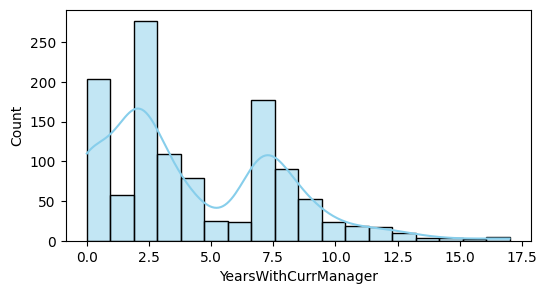

In [22]:
attributes = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for col in attributes:
    plt.figure(figsize=(6,3))
    sns.histplot(train_data[col], 
             kde=True, 
             color='skyblue',
             edgecolor='black')
    plt.show()

### **We will select initial features after getting an understanding from our EDA**

We will test the select features using statistical tests to strongly determine the best features for the predictions

In [23]:
features = ['Age','DistanceFromHome','Education','EnvironmentSatisfaction','JobLevel',
            'JobSatisfaction','MonthlyIncome','MonthlyRate',
            'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
            'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

### **Perform statistical Tests to narrow down the best features**

We will first use ANOVA test to check whether the mean of numerical variables differs significantly between attrition 0 and 1.

In [24]:
from sklearn.feature_selection import f_classif,mutual_info_classif

In [25]:
X_num = train_data[features]
y_att= train_data['Attrition']

f_value,p_value = f_classif(X_num,y_att)

anova_results = pd.DataFrame({
    'Features':features,
    'F_value':f_value,
    'P_value':p_value
}).sort_values(by='F_value',ascending=False)

print("\n--- ANOVA Results ---")
print(anova_results)


--- ANOVA Results ---
                   Features    F_value       P_value
9         TotalWorkingYears  42.143368  1.248850e-10
0                       Age  41.729236  1.532198e-10
13     YearsWithCurrManager  34.427882  5.747491e-09
11       YearsInCurrentRole  33.692718  8.297164e-09
4                  JobLevel  33.368331  9.757676e-09
6             MonthlyIncome  31.017502  3.167957e-08
10           YearsAtCompany  28.952703  8.947512e-08
3   EnvironmentSatisfaction  15.169368  1.038280e-04
5           JobSatisfaction  12.686817  3.829936e-04
1          DistanceFromHome   8.900725  2.909483e-03
8        NumCompaniesWorked   2.784982  9.541839e-02
12  YearsSinceLastPromotion   2.168856  1.410990e-01
2                 Education   1.039417  3.081671e-01
7               MonthlyRate   0.557543  4.554015e-01


In [26]:
mi_scores = mutual_info_classif(X_num,y_att)

print('\n--- Mututal Information ---')
for idx,score in enumerate(mi_scores):
    print(score,'-----',features[idx], end = '\n')


--- Mututal Information ---
0.02366164611695054 ----- Age
0.0 ----- DistanceFromHome
0.004052495491587038 ----- Education
0.013740891785413378 ----- EnvironmentSatisfaction
0.017926264382600143 ----- JobLevel
0.01796098398351198 ----- JobSatisfaction
0.0366275010949495 ----- MonthlyIncome
0.0 ----- MonthlyRate
0.0 ----- NumCompaniesWorked
0.039169136236086866 ----- TotalWorkingYears
0.02794867098258491 ----- YearsAtCompany
0.016401275605508525 ----- YearsInCurrentRole
1.1113963803044413e-05 ----- YearsSinceLastPromotion
0.006988041884129492 ----- YearsWithCurrManager


In [27]:
useless = ['MonthlyRate','Education','YearsSinceLastPromotion']

In [28]:
final_features = [col for col in features if col not in useless]

In [29]:
final_features

['Age',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

### **Selecting Categorical Features**

In [30]:
from sklearn.feature_selection import chi2, mutual_info_classif

for col in categorical_cols:
    print(f"\n--- {col} value counts ---")
    print(train_data[col].value_counts())

# 2. Attrition rate per category
for col in categorical_cols:
    print(f"\n--- Attrition Rate by {col} ---")
    print(train_data.groupby(col)['Attrition'].mean())


--- BusinessTravel value counts ---
BusinessTravel
Travel_Rarely        828
Travel_Frequently    225
Non-Travel           123
Name: count, dtype: int64

--- Department value counts ---
Department
Research & Development    764
Sales                     364
Human Resources            48
Name: count, dtype: int64

--- EducationField value counts ---
EducationField
Life Sciences       479
Medical             364
Marketing           134
Technical Degree    115
Other                62
Human Resources      22
Name: count, dtype: int64

--- Gender value counts ---
Gender
Male      704
Female    472
Name: count, dtype: int64

--- JobRole value counts ---
JobRole
Sales Executive              273
Research Scientist           220
Laboratory Technician        215
Manufacturing Director       113
Healthcare Representative    108
Manager                       83
Research Director             63
Sales Representative          60
Human Resources               41
Name: count, dtype: int64

--- MaritalSt

### **Run Chi-Square Test**

In [31]:
from sklearn.feature_selection import chi2

In [32]:
encoded_train = train_data.copy()
label_encoders = {}

In [33]:
for col in categorical_cols:
    le = LabelEncoder()
    encoded_train[col] = le.fit_transform(encoded_train[col])
    label_encoders[col] = le

In [34]:
chi_scores, p_values = chi2(encoded_train[categorical_cols], encoded_train["Attrition"])

chi_results = pd.DataFrame({
    'Feature': categorical_cols,
    'Chi2_score': chi_scores,
    'p_value': p_values
}).sort_values(by='Chi2_score', ascending=False)

In [35]:
print("\n--- Chi-Square Results ---")
print(chi_results)


--- Chi-Square Results ---
          Feature  Chi2_score       p_value
6        OverTime   38.424613  5.691010e-10
5   MaritalStatus   13.351796  2.581752e-04
4         JobRole    3.721075  5.372975e-02
1      Department    1.105200  2.931278e-01
3          Gender    0.289958  5.902472e-01
2  EducationField    0.071707  7.888669e-01
0  BusinessTravel    0.004722  9.452129e-01


In [36]:
useless_cat = ['Gender','EducationField','BusinessTravel','Department']
tentative_cat = [col for col in categorical_cols if col not in useless_cat]
print(tentative_cat)

['JobRole', 'MaritalStatus', 'OverTime']


In [37]:
mi_scores = mutual_info_classif(encoded_train[tentative_cat],encoded_train['Attrition'])

mi_cat = pd.DataFrame({
    'MI Scores':mi_scores,
    'features': tentative_cat}).sort_values(by='MI Scores',ascending=False)

print(mi_cat)

   MI Scores       features
1   0.021967  MaritalStatus
0   0.015271        JobRole
2   0.010364       OverTime


In [38]:
final_cat = tentative_cat.copy()

In [39]:
print (final_features + final_cat)

['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'JobRole', 'MaritalStatus', 'OverTime']


In [40]:
X = train_data[final_features + final_cat]
y = train_data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [41]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), final_features),
        ('cat', OneHotEncoder(drop='first'), final_cat)
    ]
)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [43]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(
        n_estimators=300, 
        learning_rate=0.05, 
        max_depth=4, 
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=7)
}

In [44]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [45]:
results = []

for model_name, model_algo in models.items():

    clf = ImbPipeline(steps=[
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('clf', model_algo)
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    })

c:\Users\Sarva\Miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:23:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [46]:
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score       AUC
3              XGBoost  0.868644   0.620690  0.473684  0.537313  0.741494
1        Random Forest  0.877119   0.695652  0.421053  0.524590  0.811138
2    Gradient Boosting  0.860169   0.580645  0.473684  0.521739  0.775253
0  Logistic Regression  0.758475   0.376623  0.763158  0.504348  0.831606
4                  SVM  0.805085   0.420000  0.552632  0.477273  0.755781
5                  KNN  0.631356   0.266667  0.736842  0.391608  0.728004


In [47]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), final_features),
        ('cat', OneHotEncoder(drop='first'), final_cat)
    ]
)

# XGBoost Model
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Create full pipeline with SMOTE
final_pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', xgb)
])

# Fit on TRAIN data only
final_pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [48]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score

y_pred = final_pipeline.predict(X_test)
y_prob = final_pipeline.predict_proba(X_test)[:,1]

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


Accuracy: 0.885593220338983
F1 Score: 0.5714285714285714
ROC AUC: 0.7464114832535885

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       198
           1       0.72      0.47      0.57        38

    accuracy                           0.89       236
   macro avg       0.81      0.72      0.75       236
weighted avg       0.88      0.89      0.88       236



In [49]:
# Transform X_train through preprocessing only
X_train_processed = final_pipeline.named_steps['preprocessing'].transform(X_train)

# Extract trained XGBoost model from pipeline
xgb_model = final_pipeline.named_steps['model']

In [50]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train_processed)


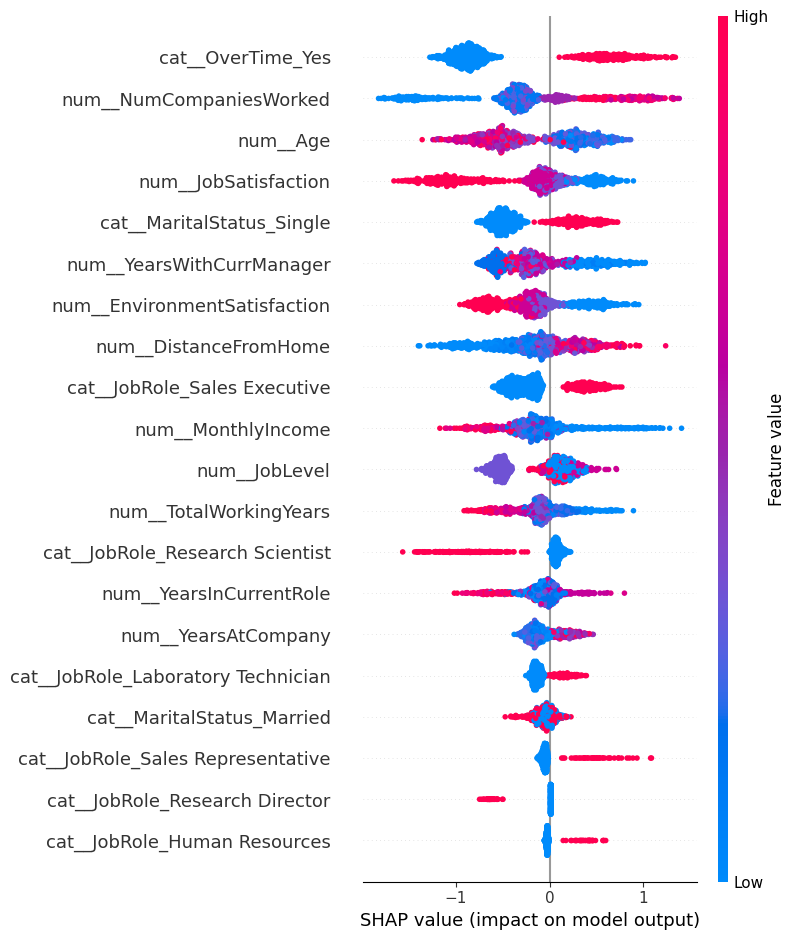

In [51]:
shap.summary_plot(shap_values, X_train_processed, feature_names=
                  final_pipeline.named_steps['preprocessing']
                  .get_feature_names_out())


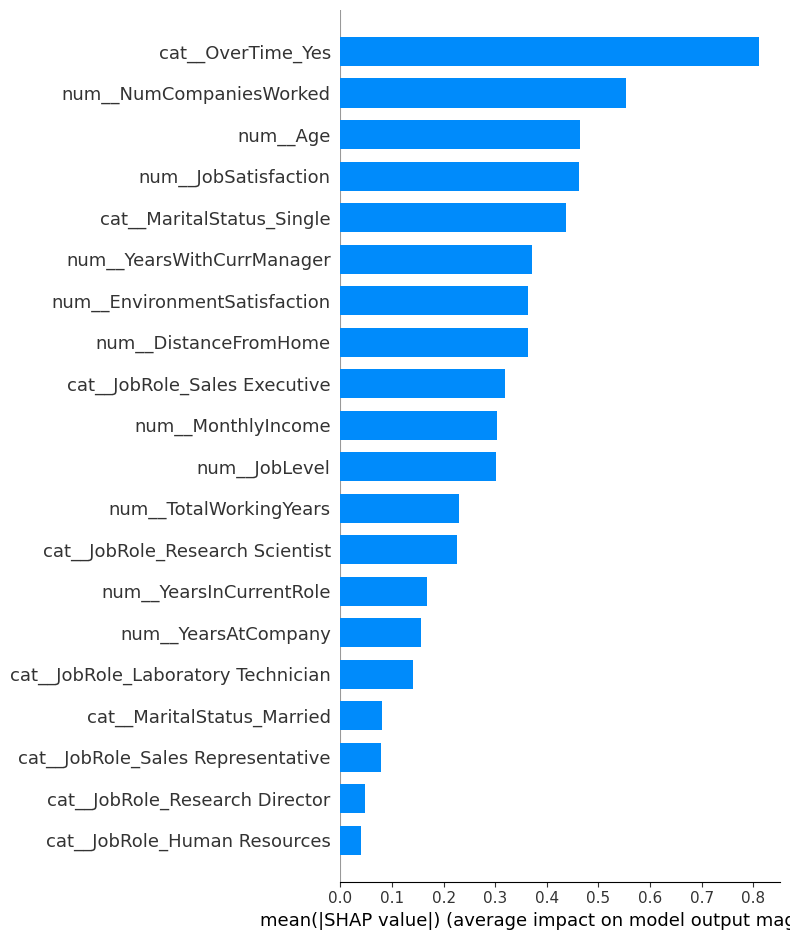

In [52]:
shap.summary_plot(shap_values, 
                  X_train_processed, 
                  feature_names=final_pipeline.named_steps['preprocessing']
                  .get_feature_names_out(),
                  plot_type="bar")

import joblib

joblib.dump(final_pipeline, r"C:/Users/Sarva/Desktop/attririon_app/models/attrition_xgb_model.pkl")
print("Model saved successfully!")

In [53]:
import joblib
joblib.dump(final_pipeline, "../models/attrition_xgb_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [54]:
import sys, shap, sklearn, numpy as np
print("Python:", sys.executable)
print("shap:", shap.__version__)
print("sklearn:", sklearn.__version__)
print("numpy:", np.__version__)


Python: c:\Users\Sarva\Miniconda3\python.exe
shap: 0.50.0
sklearn: 1.7.0
numpy: 2.2.6
